Impoting Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Collect the Dataset

In [3]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from IPython.display import Image, display
import random
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Set dataset path
dataset_dir = '/content/drive/MyDrive/Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Create output folders
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img),
                    os.path.join(output_dir, 'train', cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_dir, img),
                    os.path.join(output_dir, 'val', cls, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img),
                    os.path.join(output_dir, 'test', cls, img))

print("Dataset split completed successfully!")


Tomato__Healthy 200
Strawberry__Healthy 200
Strawberry__Rotten 200
Tomato__Rotten 200
Potato__Rotten 200
Potato__Healthy 200
Pomegranate__Rotten 200
Pomegranate__Healthy 200
Orange__Rotten 200
Orange__Healthy 200
Mango__Rotten 200
Jujube__Rotten 200
Mango__Healthy 200
Guava__Rotten 200
Jujube__Healthy 200
Guava__Healthy 200
Grape__Rotten 200
Cucumber__Healthy 200
Grape__Healthy 200
Cucumber__Rotten 200
Carrot__Healthy 200
Bellpepper__Rotten 200
Apple__Rotten 200
Banana__Healthy 200
Bellpepper__Healthy 200
Apple__Healthy 200
Banana__Rotten 200
Carrot__Rotten 200
Dataset split completed successfully!


In [5]:
# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


Found 3357 images belonging to 28 classes.
Found 1118 images belonging to 28 classes.
Found 1119 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

Data Visualization

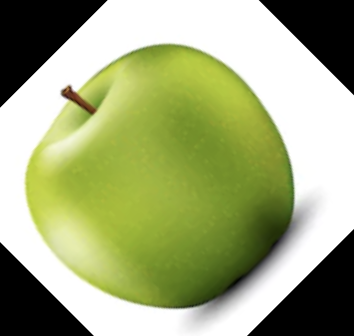

In [6]:
# Specify the path to your image folder
folder_path = '/content/drive/MyDrive/Fruit And Vegetable Diseases Dataset/Apple__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))


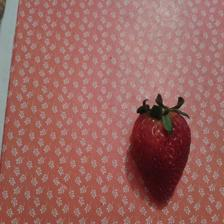

In [7]:
# Specify the path to your image folder
folder_path = '/content/drive/MyDrive/Fruit And Vegetable Diseases Dataset/Strawberry__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

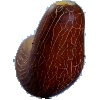

In [8]:
# Specify the path to your image folder
folder_path = '/content/drive/MyDrive/Fruit And Vegetable Diseases Dataset/Cucumber__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

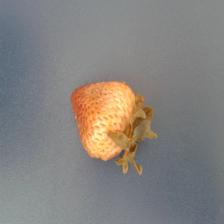

In [9]:
# Specify the path to your image folder
folder_path = '/content/drive/MyDrive/Fruit And Vegetable Diseases Dataset/Strawberry__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

Split Data and Model Building

In [10]:
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range= 0.2, shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train = train_datagen.flow_from_directory(trainpath, target_size=(224,224), batch_size = 20)
test = test_datagen.flow_from_directory(testpath, target_size=(224,224), batch_size = 20)  # 5, 15 , 32, 50

Found 3357 images belonging to 28 classes.
Found 1119 images belonging to 28 classes.


Model Building

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [14]:
vgg = VGG16(include_top = False, input_shape = (224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [16]:
len(vgg.layers)

19

In [17]:
for layer in vgg.layers:
    layer.trainable = False

In [18]:
x = Flatten()(vgg.output)

In [19]:
output = Dense(28, activation = 'softmax')(x)

In [20]:
vgg16 = Model(vgg.input, output)

In [21]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping callback
history = vgg16.fit(
    train,
    validation_data=test,
    epochs=15,
    steps_per_epoch=20,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.0578 - loss: 3.5018 - val_accuracy: 0.2484 - val_loss: 2.8256
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.2741 - loss: 2.7573 - val_accuracy: 0.4620 - val_loss: 2.2738
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4720 - loss: 2.1955 - val_accuracy: 0.5219 - val_loss: 1.9543
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5405 - loss: 1.9225 - val_accuracy: 0.5442 - val_loss: 1.7524
Epoch 5/15
 3/20 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5472 - loss: 1.7114

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5416 - loss: 1.7455 - val_accuracy: 0.6095 - val_loss: 1.5503
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6826 - loss: 1.5378 - val_accuracy: 0.6595 - val_loss: 1.4121
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7087 - loss: 1.3834 - val_accuracy: 0.6738 - val_loss: 1.3220
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7171 - loss: 1.2652 - val_accuracy: 0.6711 - val_loss: 1.2588
Epoch 9/15
 8/20 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7142 - loss: 1.2018

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 814ms/step - accuracy: 0.6832 - loss: 1.2886 - val_accuracy: 0.6756 - val_loss: 1.2245
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7387 - loss: 1.1609 - val_accuracy: 0.6988 - val_loss: 1.1490
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7242 - loss: 1.0823 - val_accuracy: 0.7069 - val_loss: 1.1114
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7226 - loss: 1.1101 - val_accuracy: 0.7212 - val_loss: 1.0596
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7413 - loss: 1.0143 - val_accuracy: 0.7489 - val_loss: 0.9959
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8193 - loss: 0.8526 - val_accuracy: 0.7560 - val_loss: 0.9696
Epoch 15/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7946 - loss: 0.8888 - val_accuracy: 0.7364 - val_loss: 0.9735


Testing Model and Data Prediction

In [23]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

Testing class - 1

In [24]:
img_path = '/content/output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg'

In [25]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0137848e-38, 0.0000000e+00, 0.0000000e+00,
        1.4515450e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [26]:
labels[np.argmax(preds)]

4

Testing class - 2

In [27]:
img_path = '/content/output_dataset/train/Mango__Rotten/anthracnose_072.jpg'

In [28]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[4.1247953e-16, 2.0313867e-16, 5.4112580e-31, 0.0000000e+00,
        6.2153309e-18, 1.7850214e-32, 0.0000000e+00, 0.0000000e+00,
        8.3960500e-27, 1.1807801e-27, 7.0064923e-45, 0.0000000e+00,
        2.0909346e-16, 4.6947473e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.8952848e-01, 1.1525164e-28, 5.5804364e-22,
        1.5600239e-13, 1.7064645e-34, 1.0410416e-27, 5.7751662e-03,
        0.0000000e+00, 0.0000000e+00, 1.6513757e-06, 4.2812720e-19]],
      dtype=float32)

In [29]:
labels[np.argmax(preds)]

17

Testing class - 3

In [30]:
img_path = '/content/output_dataset/train/Jujube__Rotten/RottenJujube (120).jpg'

In [31]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[3.5512967e-40, 7.8963647e-15, 2.2417620e-38, 0.0000000e+00,
        3.9190921e-30, 3.2945996e-13, 0.0000000e+00, 0.0000000e+00,
        3.2176010e-38, 0.0000000e+00, 3.5723988e-26, 6.5840940e-34,
        9.6747860e-16, 2.1450179e-14, 7.1289067e-21, 5.0146290e-20,
        2.8025969e-45, 0.0000000e+00, 0.0000000e+00, 1.0026955e-25,
        2.5501950e-40, 1.0000000e+00, 4.5198882e-40, 3.3560640e-24,
        0.0000000e+00, 0.0000000e+00, 9.4139831e-28, 9.6219823e-36]],
      dtype=float32)

In [32]:
labels[np.argmax(preds)]

21

Testing class - 4

In [33]:
img_path = '/content/output_dataset/train/Potato__Rotten/rottenPotato (113).jpg'

In [34]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[2.4204348e-39, 2.9294358e-09, 6.1485417e-21, 4.9567590e-12,
        3.0455074e-18, 1.3350160e-03, 4.0485784e-18, 8.0670305e-24,
        9.9866438e-01, 1.7290023e-16, 9.2622009e-14, 2.5461985e-26,
        2.9630904e-13, 5.2963799e-07, 3.4586794e-27, 1.0349007e-20,
        8.2676609e-44, 1.7748927e-31, 0.0000000e+00, 2.1719890e-33,
        3.5714239e-35, 1.6569798e-10, 4.5984750e-23, 1.4001657e-07,
        0.0000000e+00, 1.3433331e-36, 3.6168235e-25, 4.7821646e-32]],
      dtype=float32)

In [35]:
labels[np.argmax(preds)]

8

Testing class - 5

In [36]:
img_path = '/content/output_dataset/train/Orange__Healthy/rotated_by_30_Screen Shot 2018-06-13 at 12.09.54 AM.png'

In [37]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[1.00000000e+00, 3.02057851e-10, 3.70061148e-38, 0.00000000e+00,
        1.04969761e-26, 1.66859933e-25, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.80259693e-45, 0.00000000e+00, 0.00000000e+00,
        2.42041282e-22, 5.65139588e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.08457694e-30, 1.73348460e-21, 1.59872877e-28,
        0.00000000e+00, 2.71929402e-18, 8.68805048e-44, 1.10664609e-37,
        0.00000000e+00, 0.00000000e+00, 1.30433845e-33, 4.06659112e-38]],
      dtype=float32)

In [38]:
labels[np.argmax(preds)]

0

Saving the Model

In [39]:
vgg16.save('healthy_vs_rotten.keras')